In [74]:
from allensdk.brain_observatory.behavior.behavior_project_cache import BehaviorProjectCache as bpc
from visual_behavior.translator.allensdk_sessions import sdk_utils
import visual_behavior.utilities as vbu
import visual_behavior.database as db
import scipy.misc
import os
import imageio

from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
%widescreen

In [3]:
def get_movie_filepath(osid):
    well_known_files = db.get_well_known_files(osid).set_index('name')
    behavior_video_path = ''.join(well_known_files.loc['RawBehaviorTrackingVideo'][['storage_directory', 'filename']].tolist())
    return behavior_video_path

In [4]:
def get_sync_data(osid):
    well_known_files = db.get_well_known_files(osid).set_index('name')
    sync_path = ''.join(well_known_files.loc['OphysRigSync'][['storage_directory', 'filename']].tolist())
    sync_data = vbu.get_sync_data(sync_path)
    return sync_data

In [5]:
manifest_path = "/home/dougo/manifest.json"
cache = bpc.from_lims(manifest=manifest_path)

In [87]:
predictions_path = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/models/three_class_model'
predictions = [fn for fn in os.listdir(predictions_path) if fn.endswith('.npz')]
oeids = []
for fn in predictions:
    oeids.append(int(fn.split('oeid=')[1].split('_')[0]))
oeids

[794382032,
 933338703,
 963397284,
 944366183,
 841594637,
 878358326,
 977936998,
 833631932,
 995623020,
 866463736,
 896160394,
 1002576619,
 794389498,
 848694639,
 961283857,
 918548272,
 793738343,
 796108483,
 875729856,
 866929742,
 841601446,
 867343333,
 796105304,
 923100548,
 849203586,
 828965691,
 841948542,
 811988977,
 956903412,
 855582961,
 892799212,
 822647135,
 816848582,
 916769483,
 846490568,
 837297990,
 989192360,
 799357437,
 831324619]

In [116]:
for oeid in oeids:
    osid = sdk_utils.get_osid_from_oeid(oeid, cache)
    print('on oeid {}'.format(oeid))
    try:
        session = cache.get_session_data(oeid)

        sync_data = get_sync_data(osid)

        movie_path = get_movie_filepath(osid)
        movie = vbu.Movie(movie_path,sync_timestamps=sync_data['cam1_exposure_rising'])

        licks = session.licks

        predictions_path = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/models/three_class_model/predictions_oeid={}_osid={}.npz'.format(oeid,osid)
        predictions = np.load(predictions_path)

        times = sync_data['cam1_exposure_rising'][:np.shape(predictions['all_preds'])[0]]

        likely_false_positives = []
        for predicted_lick_frame in np.random.choice(np.where(np.logical_or(predictions['all_preds'][:,1]>0.5,predictions['all_preds'][:,2]>0.5))[0],500):
            predicted_lick_time = times[predicted_lick_frame]
            if len(licks.query('time > (@predicted_lick_time - 2) and time < (@predicted_lick_time + 2)')) == 0:
                likely_false_positives.append(predicted_lick_frame)
                
        savepath = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/likely_false_positives'
        for frame in likely_false_positives:
            im = movie.get_frame(frame)
            imageio.imsave(os.path.join(savepath,"oeid_{}__frame_{}.png".format(oeid, frame)),im)
    except Exception as e:
        print('failed on {}\n{}'.format(oeid,e))
    


on oeid 794382032
failed on 794382032
'behavior'
on oeid 933338703
on oeid 963397284
failed on 963397284
'behavior'
on oeid 944366183
on oeid 841594637
on oeid 878358326
on oeid 977936998
on oeid 833631932
on oeid 995623020
failed on 995623020
'behavior'
on oeid 866463736
on oeid 896160394
on oeid 1002576619
on oeid 794389498
on oeid 848694639
on oeid 961283857
on oeid 918548272
on oeid 793738343
failed on 793738343
'cam1_exposure_rising'
on oeid 796108483
failed on 796108483
'cam1_exposure_rising'
on oeid 875729856
on oeid 866929742
on oeid 841601446
on oeid 867343333
on oeid 796105304
failed on 796105304
'cam1_exposure_rising'
on oeid 923100548
on oeid 849203586
on oeid 828965691
on oeid 841948542
on oeid 811988977
failed on 811988977
'cam1_exposure_rising'
on oeid 956903412
on oeid 855582961
on oeid 892799212
on oeid 822647135
on oeid 816848582


KeyboardInterrupt: 

In [115]:
np.where(np.logical_or(predictions['all_preds'][:,1]>0.5,predictions['all_preds'][:,2]>0.5))

(array([  3539,   3540,   3541,   3542,   3544,   3545,   3546,   3547,
          3548,   3549,   3550,   3551,   3552,   3553,   3554,   3555,
          3556,   3568,   3577,   3578,   3579,   3580,   3581,   3582,
          3583,   3584,   3585,   3586,   3587,   3588,   3589,   3590,
          3591,   3592,   3593,   3594,   3595,   3596,   3597,   3598,
          3599,   3624,   3664,   3665,   3666,   3667,   3668,   3669,
          3670,   3671,   3672,   3693,   4359,   5023,   5424,   5962,
          6980,   7119,   7129,   7185,   7186,   7187,   7479,   7481,
          7483,   7484,   7498,   7599,   7779,   8179,   9578,   9579,
          9598,   9795,   9847,   9848,   9851,   9852,   9871,   9872,
         11959,  12124,  12235,  12239,  12703,  12744,  13203,  13204,
         13206,  13207,  13208,  13209,  13210,  13211,  13212,  13213,
         13214,  13215,  13217,  13218,  13219,  13220,  13224,  13225,
         13226,  13227,  13228,  13266,  13267,  13279,  13280, 

<IPython.core.display.Javascript object>


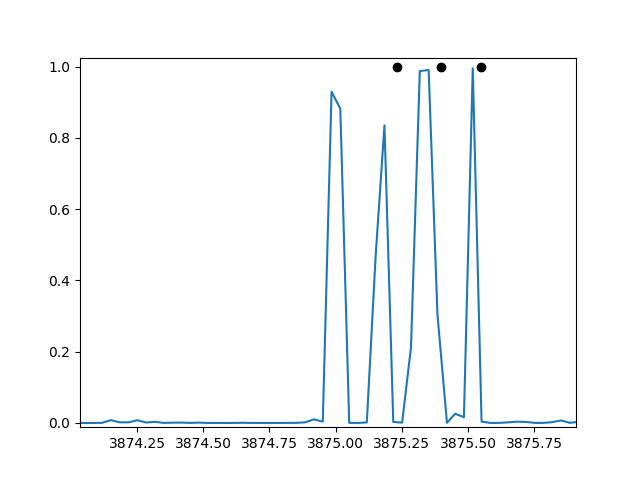

In [100]:
fig,ax=plt.subplots()
ax.plot(sync_data['cam1_exposure_rising'][:np.shape(predictions['all_preds'])[0]],predictions['all_preds'][:,2])
ax.plot(licks, np.ones_like(licks), 'ok')

In [101]:
likely_false_positives

[7921, 22659, 22498, 101816, 15253, 84, 98285, 17892, 15248, 15270]

<IPython.core.display.Javascript object>


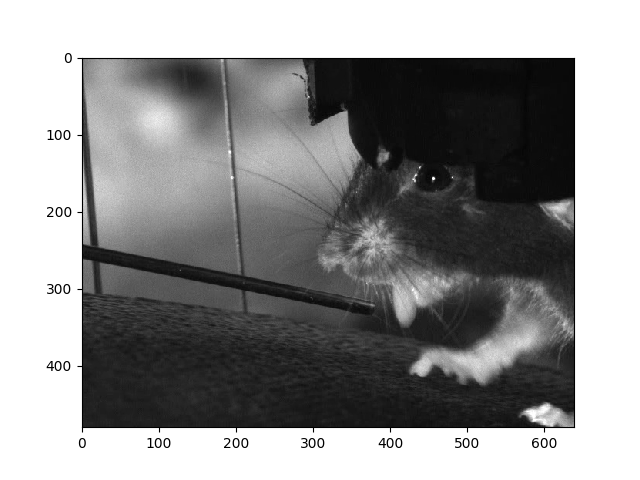

In [110]:
fig,ax=plt.subplots()
ax.imshow(movie.get_frame(likely_false_positives[8]))

In [91]:
%debug

> /home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/sync/__init__.py(283)get_stimulus_rebase_function()
    281     in the "pickle" log with the same events in the event "sync" log.
    282     """
--> 283     vsyncs = data["items"]["behavior"]['intervalsms']
    284     stimulus_timestamps_pickle_pre = np.hstack((0, vsyncs)).cumsum() / 1000.0
    285 

ipdb> data.keys()
dict_keys(['session_uuid', 'trigger_delay_sec', 'sync_pulse_port', 'di', 'sync_pulse_lines', 'mouse_id', 'nidaq_tasks', 'post_blank_sec', 'sync_sqr', 'monitor_brightness', 'stopdatetime', 'user_id', 'monitor', 'config_path', 'lims_config', 'pre_blank_sec', 'platform', 'window', 'wwidth', 'params', 'stop_time', 'startdatetime', 'droppedframes', 'config', 'do', 'scripttext', 'monitor_contrast', 'start_time', 'wheight', 'sync_pulse', 'vsynccount', 'items', 'stage', 'fps', 'intervalsms', 'sweepstim_text', 'stimuli', 'script', 'miniwindow', 'movie_output', 'sync_sqr_loc', 'sync_sqr_size', 'showmouse', 'unpicklea

In [92]:
cache.get_experiment_table().loc[oeid]

ophys_session_id                                                     793870077
behavior_session_id                                                  794093676
container_id                                                         782536745
project_code                                                    VisualBehavior
container_workflow_state                                          container_qc
experiment_workflow_state                                               failed
session_name                                               20181212_403491_7RF
session_type                                       VisCodingTargetedMovieClips
equipment_name                                                         CAM2P.5
date_of_acquisition                                 2018-12-12 16:05:07.000000
isi_experiment_id                                                    730814230
specimen_id                                                          722884882
sex                                                 

In [30]:

len(sync_data['cam1_exposure_rising'])

136114

In [23]:
np.diff(sync_data['cam1_exposure_rising'])

array([0.01627, 0.00261, 0.03322, ..., 0.03008, 0.03314, 0.04157])

In [24]:
predictions['all_preds'][0]

array([9.9920779e-01, 4.6735637e-05, 7.4559369e-04], dtype=float32)

In [37]:
sync_data['cam1_exposure_rising'][:np.shape(predictions['all_preds'])[0]]

array([1.74500000e-01, 1.90770000e-01, 1.93380000e-01, ...,
       4.53708067e+03, 4.53711749e+03, 4.53714757e+03])

In [27]:
np.shape(predictions['all_preds'])

(136112, 3)

<IPython.core.display.Javascript object>


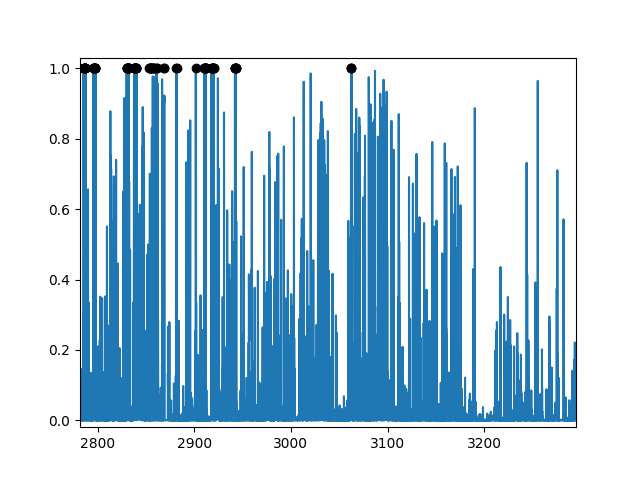

<IPython.core.display.Javascript object>


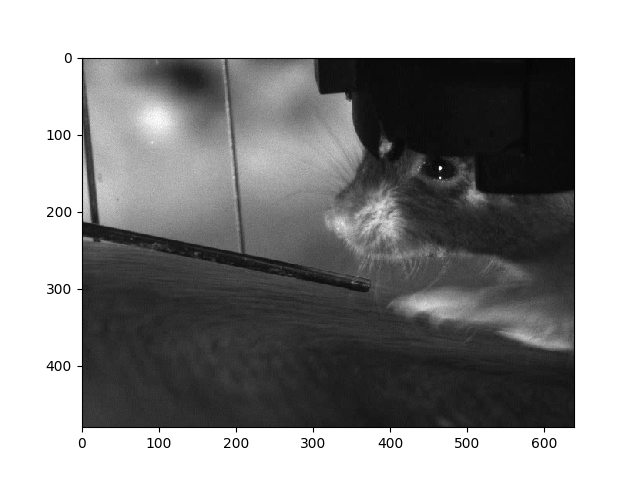

In [65]:
fig,ax=plt.subplots()
ax.imshow(movie.get_frame(likely_false_positives[15]))

KeyboardInterrupt: 

In [70]:
imageio.imsave?

In [38]:
fig,ax=plt.subplots(2,1,figsize=(12,8))
frame = 23

ax[0].cla()
ax[1].cla()

current_time = sync_data['cam1_exposure_rising'][frame]
ax[0].imshow(movie.get_frame(frame))
ax[0].set_title('lick_prob = {:0.4f}'.format(predictions['all_preds'][frame][2]))
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(sync_data['cam1_exposure_rising'][:np.shape(predictions['all_preds'])[0]],predictions['all_preds'][:,2])
ax[1].plot(licks.query('time <= @max_time'), np.ones_like(licks.query('time <= @max_time')), 'ok')
ax[1].set_xlim(current_time-1,current_time+1)
ax[1].axvline(current_time,color='black',linewidth=2)
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('lick probability')

<IPython.core.display.Javascript object>

UndefinedVariableError: local variable 'max_time' is not defined

<IPython.core.display.Javascript object>


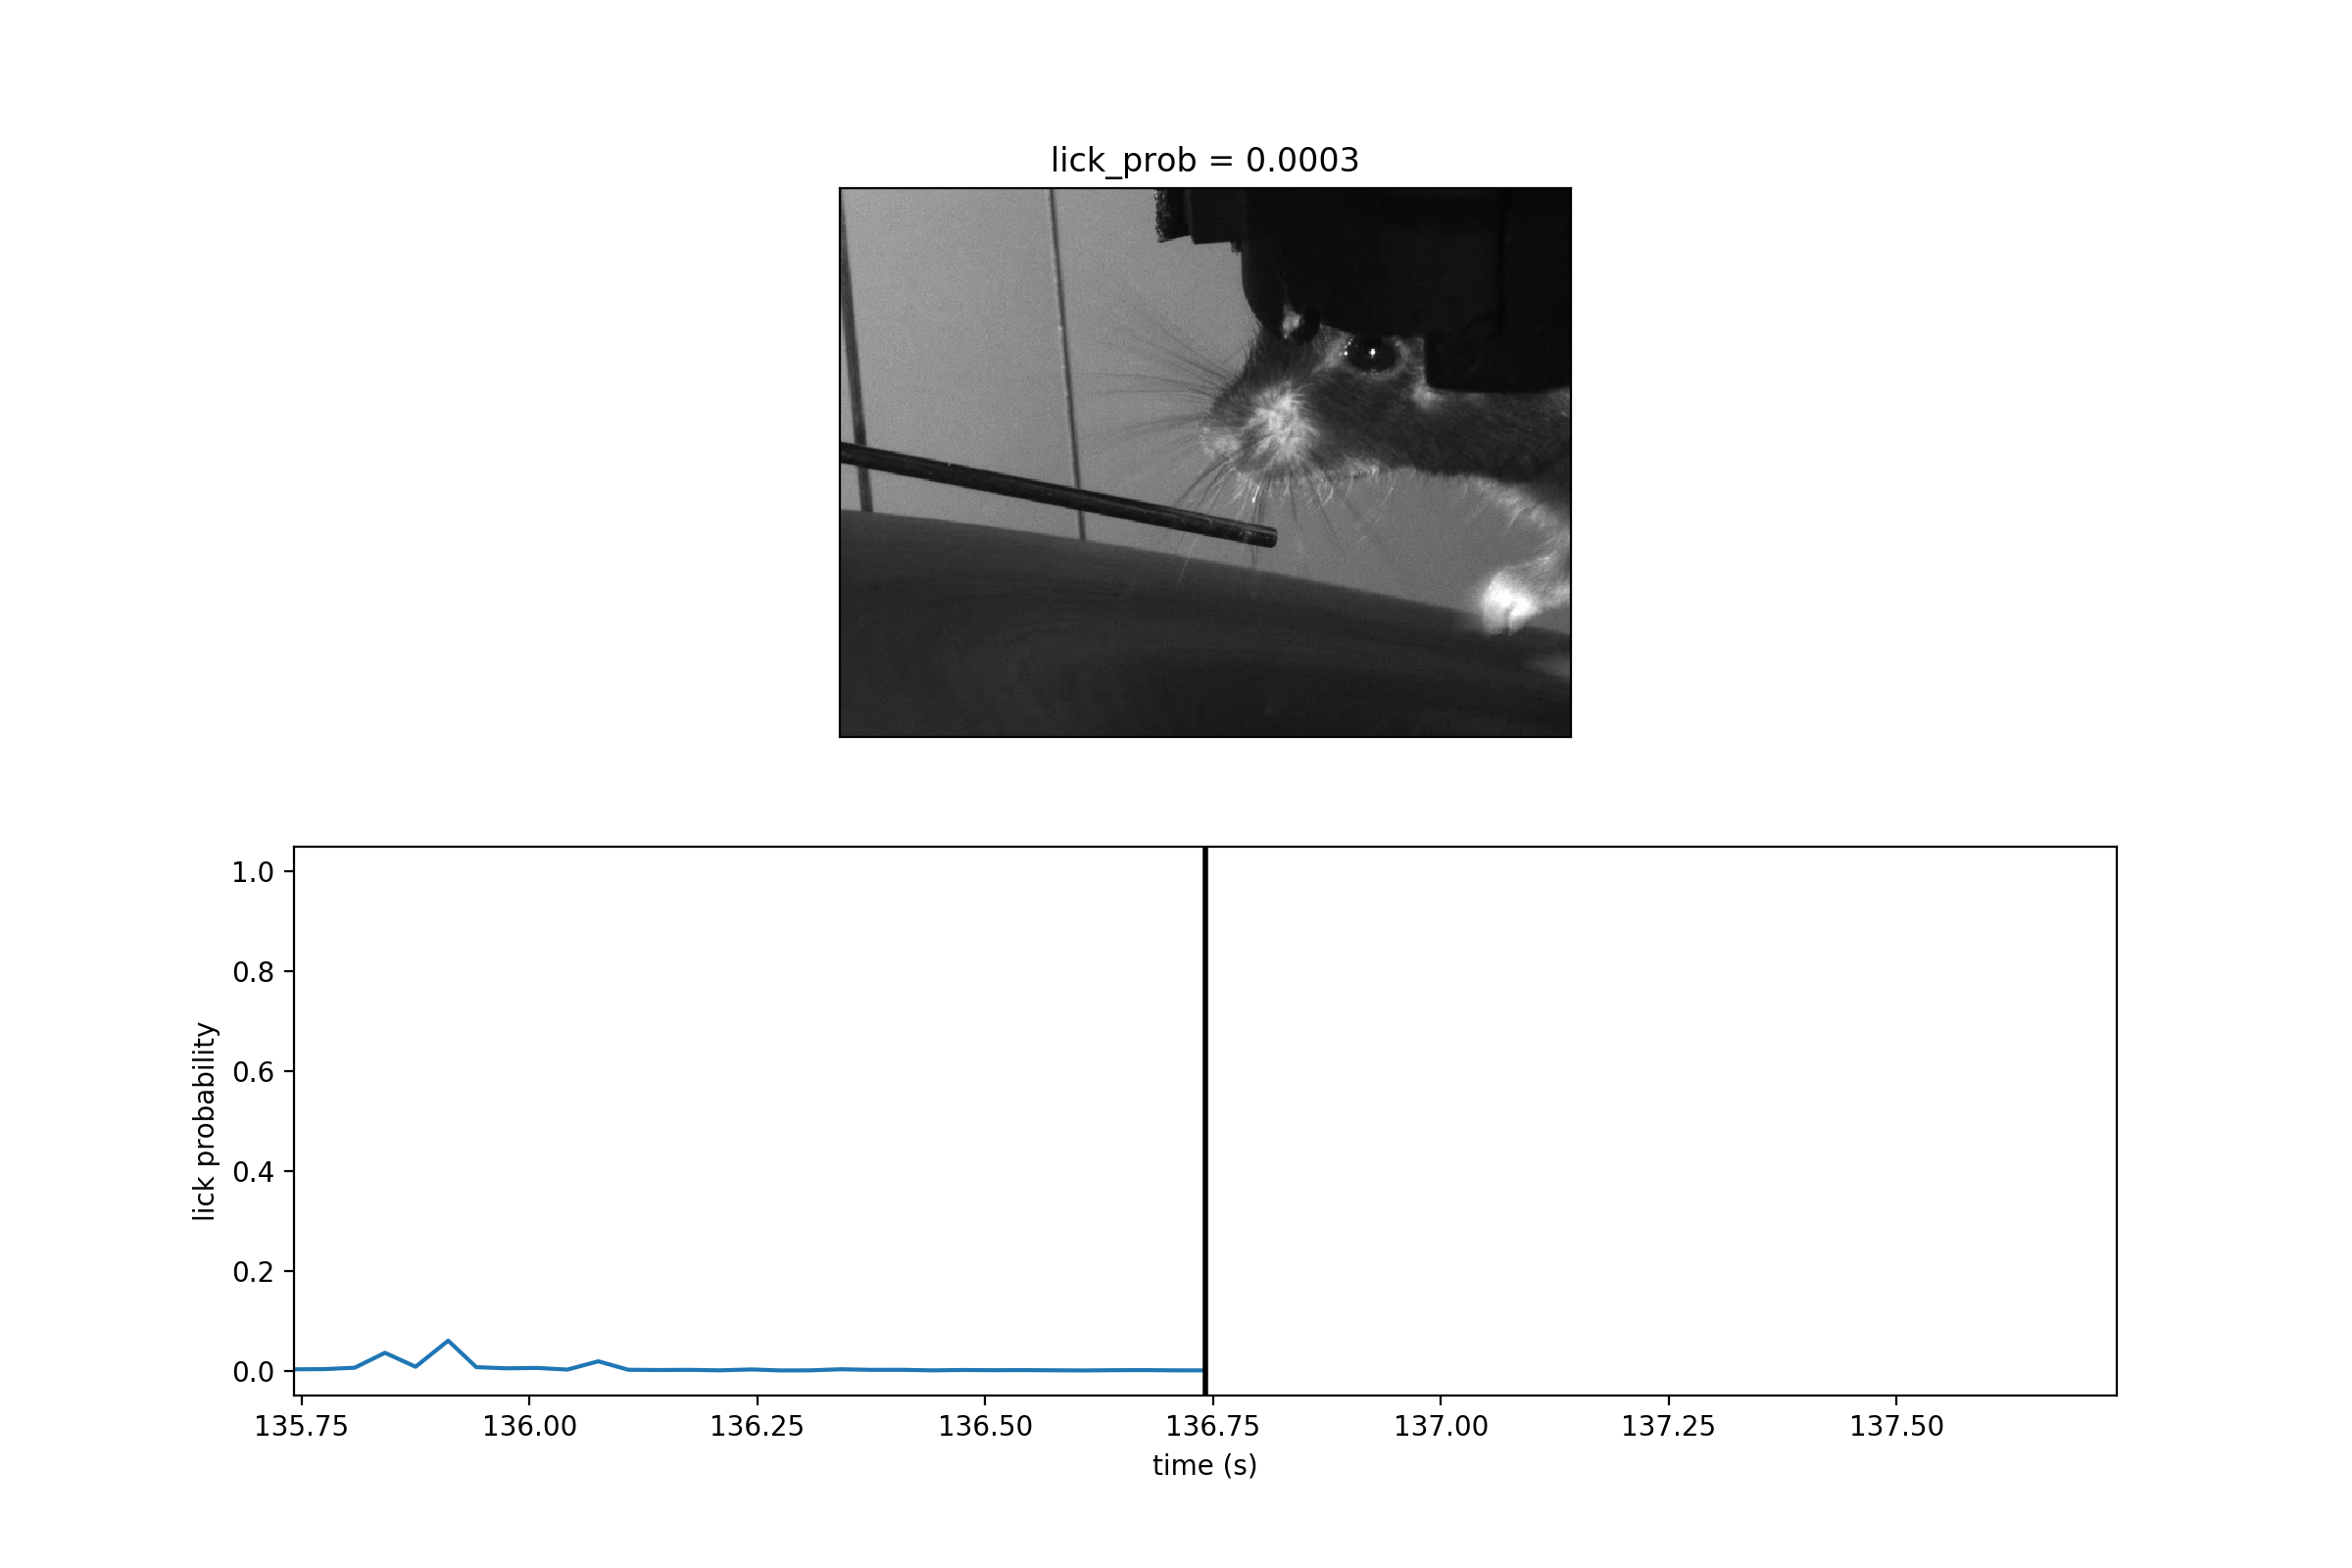

100%|██████████| 4096/4096 [30:57<00:00,  1.69it/s]


In [120]:
save_folder = '/ssd1/lick_detection_model/three_class_model/841948542_frames'
fig,ax=plt.subplots(2,1,figsize=(12,8))

for frame in tqdm(range(4096)):
    ax[0].cla()
    ax[1].cla()
    
    current_time = sync_data['cam1_exposure_rising'][frame]
    ax[0].imshow(movie.get_frame(frame))
    ax[0].set_title('lick_prob = {:0.4f}'.format(predictions['all_preds'][frame][2]))
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].plot(sync_data['cam1_exposure_rising'][:4096],predictions['all_preds'][:,2])
    ax[1].plot(licks.query('time <= @max_time'), np.ones_like(licks.query('time <= @max_time')), 'ok')
    ax[1].set_xlim(current_time-1,current_time+1)
    ax[1].axvline(current_time,color='black',linewidth=2)
    ax[1].set_xlabel('time (s)')
    ax[1].set_ylabel('lick probability')

    fig.savefig(os.path.join(save_folder,'frame={:0>5d}.png'.format(frame)),dpi=100)

<IPython.core.display.Javascript object>


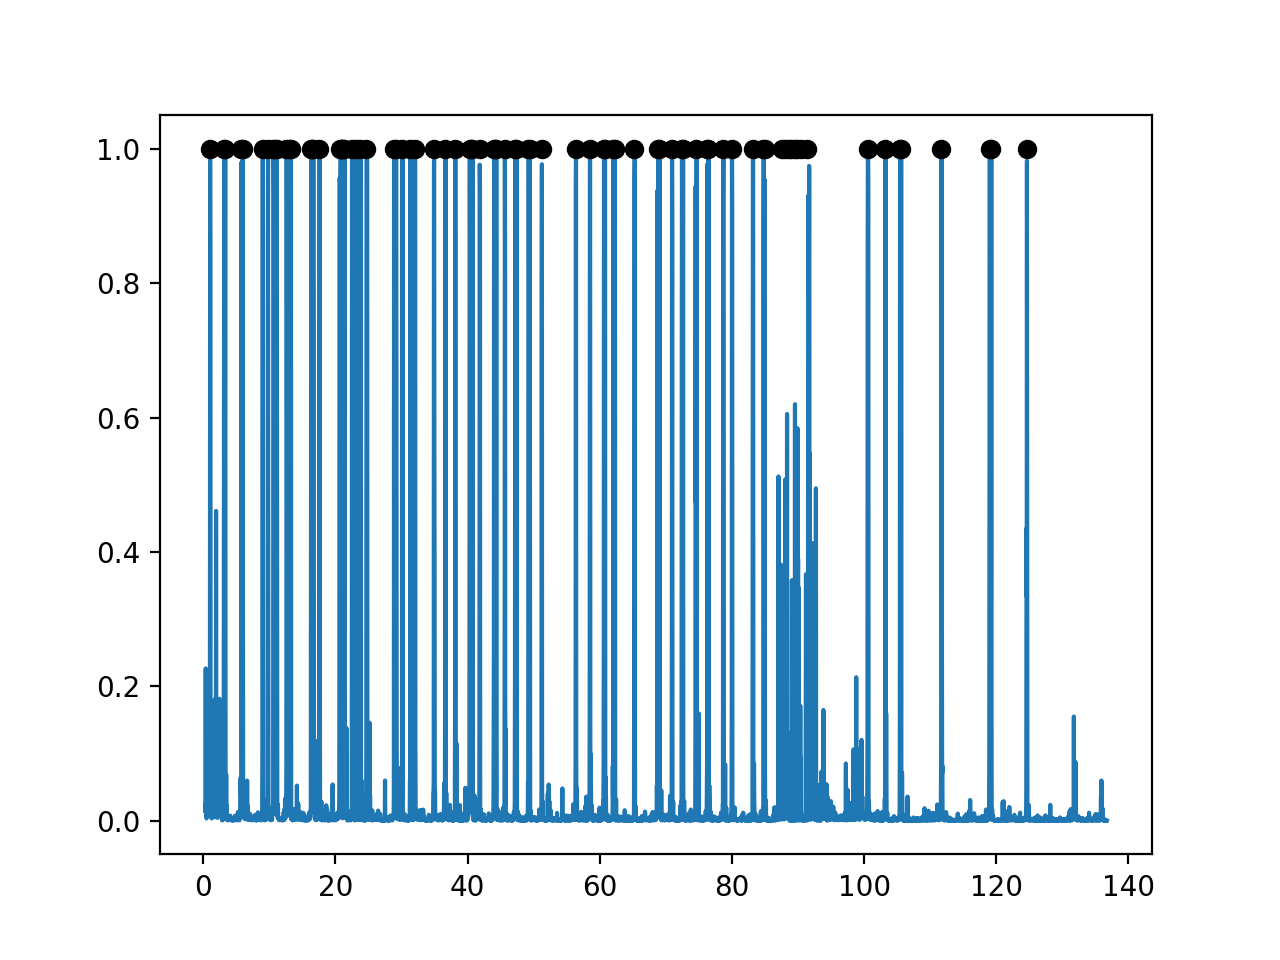

In [97]:
fig,ax=plt.subplots()
max_time = sync_data['cam1_exposure_rising'][4096]
ax.plot(sync_data['cam1_exposure_rising'][:4096],predictions['all_preds'][:,2])
ax.plot(licks.query('time <= @max_time'), np.ones_like(licks.query('time <= @max_time')), 'ok')

In [95]:
max_time = sync_data['cam1_exposure_rising'][4096]
licks.query('time <= @max_time')

,time
0,1.01708
1,3.14674
2,3.27260
3,5.77010
4,5.95047
5,8.97777
6,9.77713
7,10.59226
8,10.79162
9,11.10806
